# Credit Risk Scoring Project


## 1. Framework

The goal is to predict whether or not a customer will fail to return a loan. Another words we want to predict the risk of default that is the failure to pay back the money. A bank makes an assesment of loan applications by scoring each customer, evaluates the risk of default and if it is too high reject the application. The process known as 'credit risk scoring'$^1$.

Imagine we are data scientists at the bank. We must predict the customers who carry a risk of default. Luckily, we have a dataset which contains important client information (expenses, assets, income, demographic information such as age etc.) and default information (1/0) if the client has the risk of default '1', otherwise '0'. We will use this dataset to build a prediction model.

This is a supervised learning problem since we have the label (default status) in the dataset and a logistic regression problem since we will predict a **class** (positive, 1/negative, 0). More specifically, it is a binary classification problem.

To measure the performance of our model, we use several metrics; accuracy, roc_auc_score, precision and recall.

Attribute Information$^{1}$:

 - status: whether the customer paid back the loan(1) or not (2)
 - seniority: job experience in years
 - home: homeownership: renting(1), homeowner(2) and others group 
 - time: number of months planned for the loan 
 - age: clients age
 - marital (status): single(1), married(2), and others 
 - records: whether the client has any previous record in the bank: no(1), yes(2)
 - job: full time(1), partime(2), and others.
 - expenses: how much the client spends per month 
 - income: income per month
 - assests:all the assest that client have.
 - debth: amount of credit debth
 - amount: requested amount of the loan
 - price: price of the item the client wants to buy.

 

<br>

**References**

**1.** Grigorev A.,*Machine Learning Bookcamp*,1st Edition, 2021, Manning Publications Co.,NY.
<br>
**2.** Geron A., *Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow*, 2nd Edition, 2019, O'Reilly Media, Inc., CA. 
<br>
 **3.** Scikit-learn.org
<br>
**4.** Kuhn M., Johnson K., *Applied Predictive Modelling*, 5th edition, 2013, Springer, NY.
<br>
**5.** Kuhn M., Johnson K., *Feature Engineering and Selection: A Practical Approach for Predictive Models*, 2020, Taylor & Francis Group, LLC.
<br>


## 2. Download the Data

I use Jupyter notebook on Windows machine, therefore some linux commands might differ for other machines.

In [1]:
#!pip install wget

In [2]:
#Make a project folder where you can download the data
#!mkdir credit-risk

In [3]:
cd C:\\Users\\user\\credit-risk

C:\Users\user\credit-risk


In [4]:
# Download the data
#!python -m wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

## 3. Preliminary Preparation
#### Import Libraries

In [5]:
import numpy as np
import pandas as pd
# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data


In [6]:
df_org=pd.read_csv('CreditScoring.csv')
#make a copy
df=df_org.copy()
df.head(5)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#### Make the data uniform
- A quick look `df.head()` shows column names start wtih capital.To be safe and for ease during the analysis, lets make everything uniform, lowercase (or uppercase).

In [7]:
# Make each column name uniform.
df.columns = [col.lower() for col in df.columns]

#### Check the attribute - data type match

In [8]:
df.dtypes

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

- All data types show integer. Let's select the categorical variables and convert their data type to object.

In [9]:
convert=['status', 'home', 'marital', 'records', 'job']
df[convert] = df[convert].astype(str)

In [10]:
df['status'].value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

- The target, status (whether the customer paid back the loan,1 or not, 2),  has one unknown (0) data. Since we need two labels for our purposes, it is a binary classification problem, and only one data is unknown, lets remove it.

In [11]:
df= df[df['status']!='0']

In [12]:
df['status'].value_counts()

1    3200
2    1254
Name: status, dtype: int64

- Lets map the real categorical variables. 

In [13]:
status_dict={'1':'ok', '2':'default'}
home_dict={'1':'rent', '2':'owner', '3':'private', '4':'ignore', '5':'parents', '6':'other'}
marital_dict={'1':'single', '2':'married', '3':'widow', '4':'separated', '5':'divorced', '6':'unknown'}
records_dict={'1':'no', '2':'yes', '3':'unknown'}
job_dict={'1':'fixed', '2':'parttime', '3':'freelance', '4':'others', '5':'unknown'}

In [14]:
df['status']=df['status'].map(status_dict)
df['home']=df['home'].map(home_dict)
df['marital']=df['marital'].map(marital_dict)
df['records']=df['records'].map(records_dict)
df['job']=df['job'].map(job_dict)

In [15]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


- For binary classification, models except numbers, 1 and 0 for yes and no, respectively.

In [16]:
#df['status']=(df['status']=='default').astype(int)
df['status']=df['status'].map({'default': 1, 'ok': 0}).astype(int)

In [17]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


## 4. Quick Overview and Creating a Test Data 

In [18]:
# For a quick data description
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4454 non-null   int32 
 1   seniority  4454 non-null   int64 
 2   home       4448 non-null   object
 3   time       4454 non-null   int64 
 4   age        4454 non-null   int64 
 5   marital    4453 non-null   object
 6   records    4454 non-null   object
 7   job        4452 non-null   object
 8   expenses   4454 non-null   int64 
 9   income     4454 non-null   int64 
 10  assets     4454 non-null   int64 
 11  debt       4454 non-null   int64 
 12  amount     4454 non-null   int64 
 13  price      4454 non-null   int64 
dtypes: int32(1), int64(9), object(4)
memory usage: 504.6+ KB


In [19]:
# For a statistical description of the data with numerical attributes 
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
status,4454.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
seniority,4454.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4454.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4454.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4454.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4454.0,763488.0,8704595.0,0.0,80.0,120.0,166.0,99999999.0
assets,4454.0,1060578.0,10218704.0,0.0,0.0,3500.0,6000.0,99999999.0
debt,4454.0,404473.0,6344963.0,0.0,0.0,0.0,0.0,99999999.0
amount,4454.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4454.0,1463.0,628.0,105.0,1117.0,1400.0,1692.0,11140.0


- For the attributes; income, assets and debt, the max value is ('99999999.0') clearly is not a real value. Lets replace '99999999.0' values with NaN.

- Recall, the null values are not included in the statistical calculations of the columns.

In [20]:
cols=['income', 'assets', 'debt']
df[cols]=df[cols].replace({99999999.0: np.nan})

In [21]:
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
status,4454.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
seniority,4454.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4454.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4454.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4454.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4420.0,131.0,86.0,0.0,80.0,120.0,165.0,959.0
assets,4407.0,5404.0,11574.0,0.0,0.0,3000.0,6000.0,300000.0
debt,4436.0,343.0,1246.0,0.0,0.0,0.0,0.0,30000.0
amount,4454.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4454.0,1463.0,628.0,105.0,1117.0,1400.0,1692.0,11140.0


- In the statistical description above, I like to look at the columns; std, mean and the 50% (median). 
Because, Std (standart deviation) measures the average distance of each data point from the mean value and, 
it is greatly affected by the outliers. For example, for the variables **assets** and **debt**, the std values are higher 
than the mean values! But, since the 50% is the median, if we look at the 50% values for these variables, they are much lower 
than the mean (average) values, indicating that we have some outliers. Note that the median is not effected by outliers, the mean is, and this is important to remember 
when replacing the missing values. 


- To better understand the distribution of each numerical attributes lets plot the histograms for each.  

### Histograms of Numerical Attributes

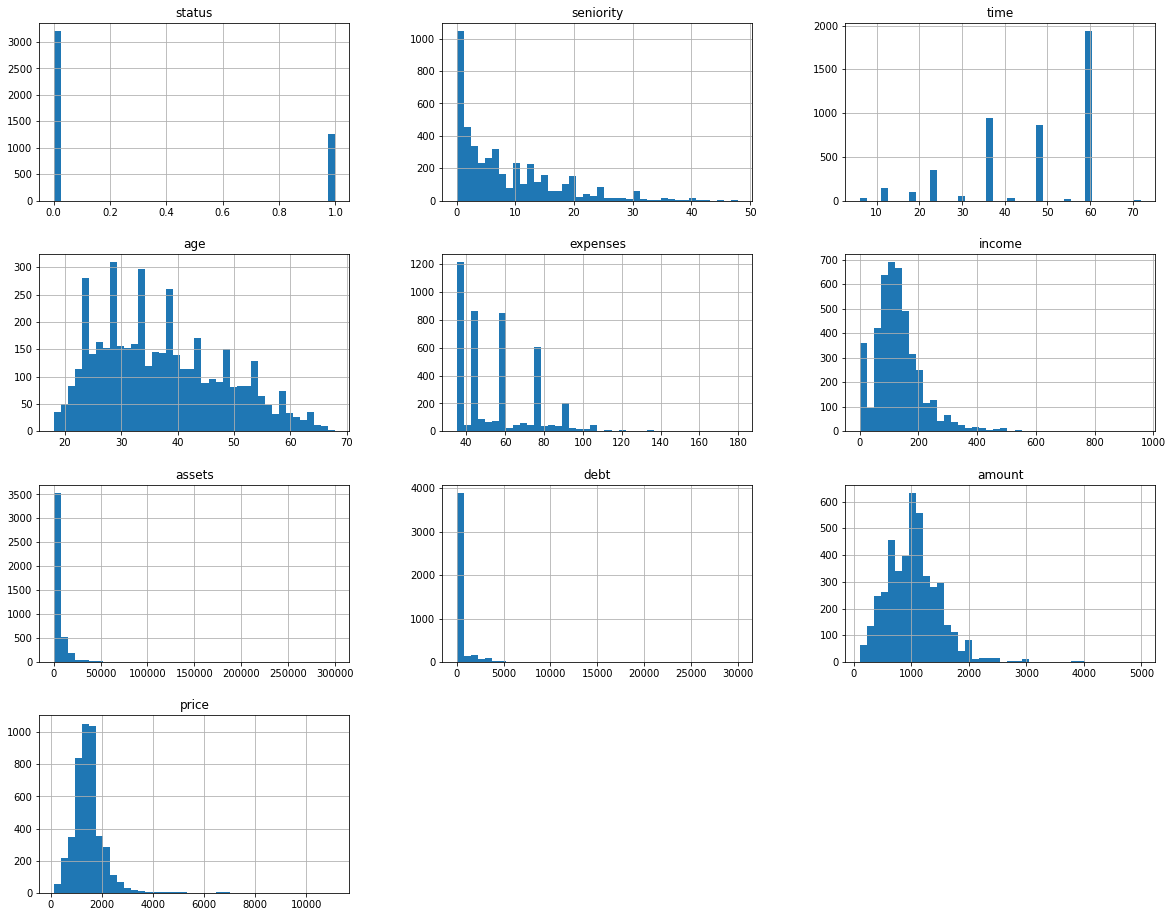

In [22]:
# For more information about the distribution of each numerical attributes,histograms for each.
%matplotlib inline
df.hist(bins=40, figsize=(20,16))
plt.show() 

A histogram shows attribute values on the horizantal axis and the frequency of these values (count) on the vertical (y) axis. 
We have some skewed right (tail right) distributions. Tail right indicates that we have outliers on the right.

We will look at the target, status variable closer in the next section. 

The following observations can be made for the majority of the clients:

- they have job experince less than 10 years.

- their payment plans longer than 30 months.

- they are less than 50 years old.

- their expenses less than 80

- their income is under 200.

- they don't have much assets.

- they don't have debt.

- the loan amount they asked is  about 1000.

- they want to purchase someting about 2000.

#### Create a Test Data
- So far, we looked at the whole dataset, made small preparations such as making the column names lowercase and mapping the real values. None of these should cost data leakage since there is nothing to effect choices about the model. However, before continuing with the remaining data pre-processing, we must split the data.


- We want to make sure that the test set is the representive of the various categories of the label in the whole dataset $^2$.
In this case we want proportion of distribution of 'status' label to be the representive of whole data. 

In [23]:
from sklearn.model_selection import train_test_split

# 20% of data is separated hold out test set..
df_train,df_test  = train_test_split(df, test_size=0.2, stratify=df['status'], shuffle=True, random_state=42)

- Let's confirm the proportions for the status (default or not default (ok)) .

In [24]:
print(df_test['status'].value_counts().rename_axis("test data - status"), '\n')
print(df_test['status'].value_counts(normalize=True).round(2).rename_axis("test data- status proportions"), '\n')
print(df['status'].value_counts().rename_axis("whole dataset - status"), '\n')
print(df['status'].value_counts(normalize=True).round(2).rename_axis("whole dataset- status proportions"))

test data - status
0    640
1    251
Name: status, dtype: int64 

test data- status proportions
0    0.72
1    0.28
Name: status, dtype: float64 

whole dataset - status
0    3200
1    1254
Name: status, dtype: int64 

whole dataset- status proportions
0    0.72
1    0.28
Name: status, dtype: float64


## 5. Data Exploration and Making Decisions for Data Preparation
### Study the Missing Values
#### Percantage of missing values

In [25]:
# We will remove a column if it has more than %25 null values
missing_percent= df_train.isnull().sum() * 100 / len(df_train)
missing_percent[missing_percent >0]

home       0.112265
marital    0.028066
job        0.028066
income     0.813921
assets     1.066517
debt       0.392927
dtype: float64

 #### Replacing missing values in numerical features
- We want to replace the missing values in the columns above, however, we do not know if the test data has missing values in other features. To be safe, we will use Scikit-Learn's SimpleImputer to replace the missing values with their median for the all numerical columns. The reason for median is that it is the most frequent value and not affected by the outliers. In addition, for some numerical features such as loan amount and age, replacing missing values by median make more sense than replacing them with a constant such as zero. But, in this problem, I do believe, several features have missing values because they are zero, such as income and assests. Therefore, it might be better if we divide the numerical features in two groups and replace the missing values accordingly. 


#### Replacing missing values in categorical features


- For the categorical features, we can use either the most frequent category, or again use Scikit-Learn's SimpleImputer to replace the missing values whichever option we prefer. If we choose strategy == “constant”, the fill_value argument is used to replace all occurrences of missing_values. If left to the default, fill_value will be 0 when imputing numerical data and “missing_value” for strings or object data types$^{3}$. 


- Since, we do not know if the test data has missing values in other categorical variables, we will use the imputer for the all categorical columns.

### Understanding the target variable

In [26]:
df_train['status'].value_counts()

0    2560
1    1003
Name: status, dtype: int64

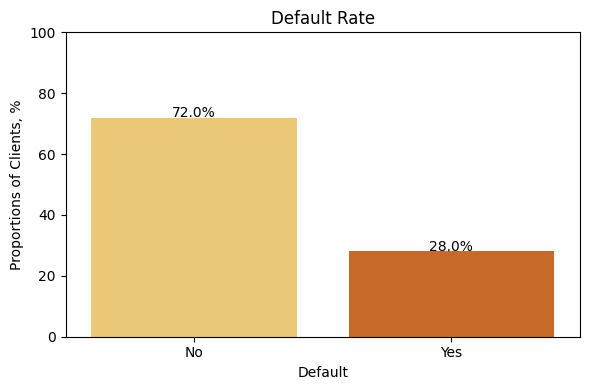

In [27]:
df_stat= df_train['status'].value_counts(normalize=True).round(2)*100
df_stat=df_stat.rename(index={0: 'No', 1:'Yes'})
percentage=df_stat.values 
plt.figure(figsize=(6, 4), dpi=100)
ax = sns.barplot(x=df_stat.index, y=df_stat.values, palette="YlOrBr")
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.ylim(0, 100)
plt.title('Default Rate')
plt.xlabel('Default')
plt.ylabel('Proportions of Clients, %')
plt.tight_layout()
plt.show()

- The proportion of rejected (default) clients among all clients is called 'Default Rate'. It shows that we have imbalanced data, about 28% default, 72% not default.

### Studying Correlations
### Looking for Correlations in Numerical Attributes

In [28]:
corr_matrix= df_train.corr()
corr_matrix

,status,seniority,time,age,expenses,income,assets,debt,amount,price
status,1.000000,-0.255211,0.105045,-0.106313,0.010955,-0.218762,-0.099832,0.013976,0.153430,0.003540
seniority,-0.255211,1.000000,-0.023822,0.513107,0.129259,0.137564,0.129181,-0.017257,-0.016364,0.032253
time,0.105045,-0.023822,1.000000,-0.050981,0.004605,-0.009918,-0.088593,0.063378,0.437560,0.131797
age,-0.106313,0.513107,-0.050981,1.000000,0.248774,0.110656,0.172137,-0.042635,0.028531,0.038800
expenses,0.010955,0.129259,0.004605,0.248774,1.000000,0.255436,0.012468,0.034997,0.056123,0.041924
income,-0.218762,0.137564,-0.009918,0.110656,0.255436,1.000000,0.138175,0.138391,0.145970,0.180201
assets,-0.099832,0.129181,-0.088593,0.172137,0.012468,0.138175,1.000000,0.163697,0.162753,0.217353
debt,0.013976,-0.017257,0.063378,-0.042635,0.034997,0.138391,0.163697,1.000000,0.053803,0.046537
amount,0.153430,-0.016364,0.437560,0.028531,0.056123,0.145970,0.162753,0.053803,1.000000,0.721747
price,0.003540,0.032253,0.131797,0.038800,0.041924,0.180201,0.217353,0.046537,0.721747,1.000000


- These coefficients are by default pearson : standard correlation coefficient, they take values between -1 and +1. 
Positive and negatives signs indicates positive and negative associations. Coeffients closer to zero indicate weak association $^2$. Lets only look at features, their correlation matrix with heatmap. 

<AxesSubplot:>

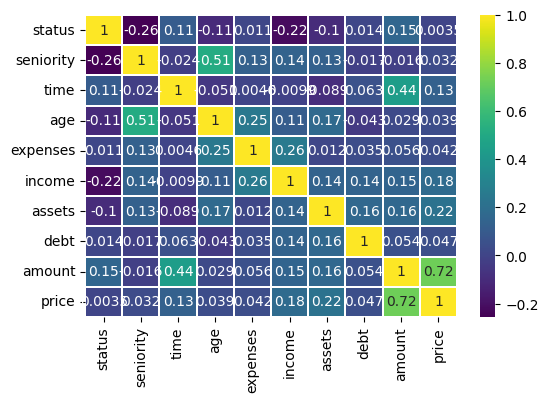

In [29]:
plt.figure(figsize=(6,4), dpi=100)
sns.heatmap(df_train.corr(), cmap='viridis', annot=True, linewidth=0.2)

- The heatmap shows that the brighter the color is more positive the association, the darker the color is
more negative the association. The correlation threshold is arbitrary and may need to be raised or lowered depending on the problem and the models to be used$^{3}$. 


- It is suggested for the models sensitive to between-predicter correlations,
a threshold of 0.75 might be applied$^{4}$. 


- As seen from the heatmap, the highest between-predicter correlation is 0.72 less then 0.75, so no action is needed here.

### Relationship between the Numerical variables and Label (Default Status)

In [30]:
#Correlation of each attribute with target, status
corr_matrix['status'].sort_values(ascending=False)[1:]

amount       0.153430
time         0.105045
debt         0.013976
expenses     0.010955
price        0.003540
assets      -0.099832
age         -0.106313
income      -0.218762
seniority   -0.255211
Name: status, dtype: float64

- Let's drop the variable with the weakest correlation to simplify the model to prevent overfitting.

In [31]:
drop_cols=[]
drop_cols.append('price')

- Let's look at the  relationship between the default rate by several variables with high correlation.

### Amount and Default Rate 

- Amount column has no missing values, therefore we can divide it into groups as in the function below. Recall, we are not given any units for the amount (or assets).

In [32]:
def group_amount(amount):
    if amount < 500:
        return '100-500'
    elif amount < 1500:
        return '500-1500'
    elif amount < 2000:
        return '1500-2000'
    else:
        return 'Over 2000'

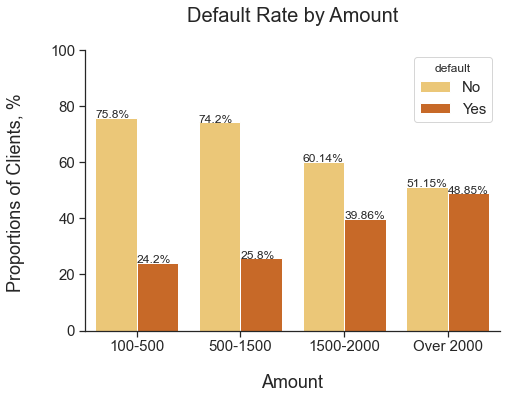

In [33]:
df_train['amountgroup']=df_train['amount'].apply(group_amount)
df_amount = df_train.groupby('amountgroup')['status'].value_counts(normalize=True).mul(100)
df_amount = df_amount.rename('percent').reset_index()
df_amount['status'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['100-500', '500-1500','1500-2000','Over 2000']

sns.set_theme(style="ticks")
g = sns.catplot(x='amountgroup',y='percent',hue='status',kind='bar', order=order, data=df_amount, aspect=1.2, height=6, legend=False,palette="YlOrBr")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Amount\n ',fontsize=20)
plt.xlabel('Amount\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients, % \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='default')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   

- The more the requested loan amount, higher the chance of rejection (default). For the high amounts over 2000, almost half of the request rejected.

### Time and Default Rate

- Time column has no missing values, therefore we can divide it into groups as in the function below

In [34]:
def group_time(time):
    if time < 12:
        return '6-12'
    elif time < 24:
        return '12-24'
    elif time < 48:
        return '24-48'
    else:
        return '48-72'

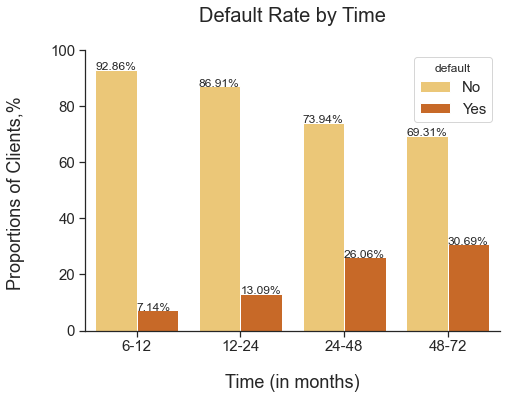

In [35]:
df_train['timegroup']=df_train['time'].apply(group_time)
df_time = df_train.groupby('timegroup')['status'].value_counts(normalize=True).mul(100)
df_time = df_time.rename('percent').reset_index()
df_time['status'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['6-12', '12-24','24-48','48-72']
sns.set_theme(style="ticks")
g = sns.catplot(x='timegroup',y='percent',hue='status',kind='bar',order= order, data=df_time, aspect=1.2, height=6, legend=False,palette="YlOrBr")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Time\n ',fontsize=20)
plt.xlabel('Time (in months)\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='default')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()

- The longer the requsted payment time, more the risk of default.

### Senority and Default Rate

- Senority column has no missing values, therefore we can divide it into groups as in the function below.

In [36]:
def group_senior(senior):
    if senior < 2:
        return '0-2'
    elif senior < 5:
        return '2-5'
    elif senior < 15:
        return '5-15'
    elif senior < 25:
        return '15-25'
    else:
        return 'Over 25'

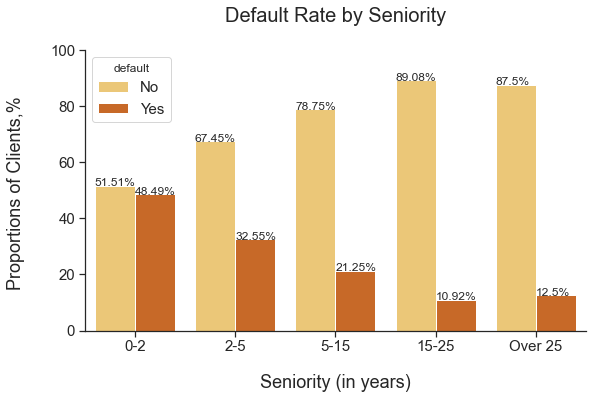

In [37]:
df_train['seniorgroup']=df_train['seniority'].apply(group_senior)
df_senior = df_train.groupby('seniorgroup')['status'].value_counts(normalize=True).mul(100)
df_senior = df_senior.rename('percent').reset_index()
df_senior['status'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['0-2', '2-5','5-15','15-25','Over 25']

sns.set_theme(style="ticks")
g = sns.catplot(x='seniorgroup',y='percent',hue='status',kind='bar',order=order, data=df_senior, aspect=1.4, height=6, legend=False,palette="YlOrBr")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Seniority\n ',fontsize=20)
plt.xlabel('Seniority (in years)\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left', title='default')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()

- The negative correlation is very visible. the more senior the client, more chance of approval (not default).

### Income and Default Rate

- Income column has 29 missing values, therefore we can divide it into groups as in the function below, 
placing missing income group to the Unknown category.

In [38]:
def group_income(income):
    if income == 0:
        return 'No Income'
    elif income < 200:
        return 'Under 200'
    elif income < 400:
        return '200-400'
    elif income < 600:
        return '400-600'
    elif income < 1000:
        return '600-1000'       
    else:
        return 'Unknown'

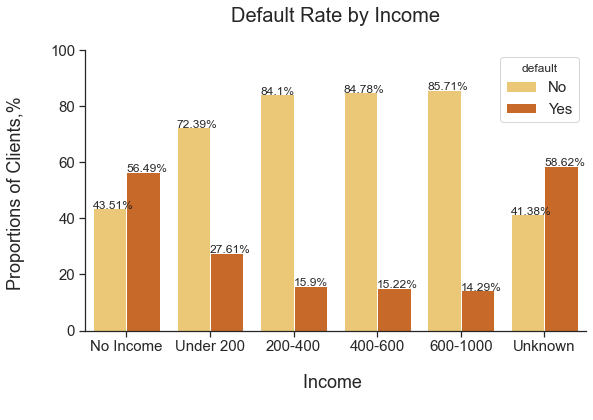

In [39]:
df_train['incomegroup']=df_train['income'].apply(group_income)
df_income = df_train.groupby('incomegroup')['status'].value_counts(normalize=True).mul(100)
df_income = df_income.rename('percent').reset_index()
df_income['status'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['No Income', 'Under 200','200-400','400-600','600-1000','Unknown']

sns.set_theme(style="ticks")
g = sns.catplot(x='incomegroup',y='percent',hue='status',kind='bar',order=order, data=df_income, aspect=1.4, height=6, legend=False,palette="YlOrBr")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Income\n ',fontsize=20)
plt.xlabel('Income \n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='default')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()

- The higher the income less risk of default (negative correlation).

### Age and Default Rate

- Age column has no missing values, therefore we can divide it into groups as in the function below.

In [40]:
def group_age(age):
    if age  <25:
        return '18-25'
    elif age < 35:
        return '25-35'
    elif age < 45:
        return '35-45'
    elif age <= 55:
        return '45-55'     
    else:
        return 'Over 55'

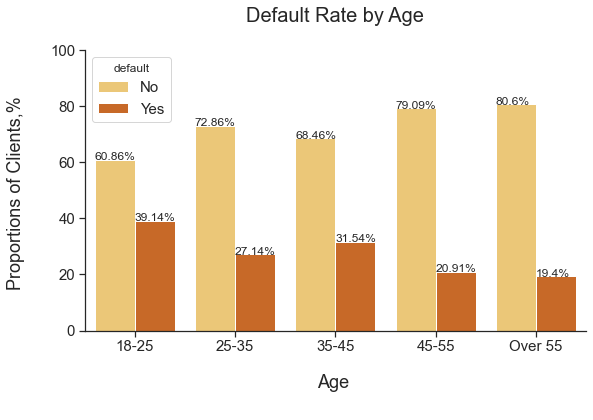

In [41]:
df_train['agegroup']=df_train['age'].apply(group_age)
df_age = df_train.groupby('agegroup')['status'].value_counts(normalize=True).mul(100)
df_age = df_age.rename('percent').reset_index()
df_age['status'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['18-25', '25-35','35-45','45-55','Over 55']

sns.set_theme(style="ticks")
g = sns.catplot(x='agegroup',y='percent',hue='status',kind='bar',order=order, data=df_age, aspect=1.4, height=6, legend=False,palette="YlOrBr")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Age\n ',fontsize=20)
plt.xlabel('Age \n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left', title='default')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()

- Over all the older the client is, less the risk of default.

### Assets and Default Rate

In [42]:
sum(df_train['assets'].isna())

38

- Age column has 38 missing values, therefore we can divide it into groups as in the function below, 
grouping the missing values under the Unknown category.

In [43]:
def group_assets(assets):
    if assets  == 0:
        return 'No Assets'
    elif assets < 2500:
        return 'Under 2500'
    elif assets < 5000:
        return '2500-5000'
    elif assets < 10000:
        return '5000-10000'     
    elif assets < 20000:
        return '10000-20000'
    elif assets >= 20000:
        return 'Over 20000'
    else:
        return 'Unknown'

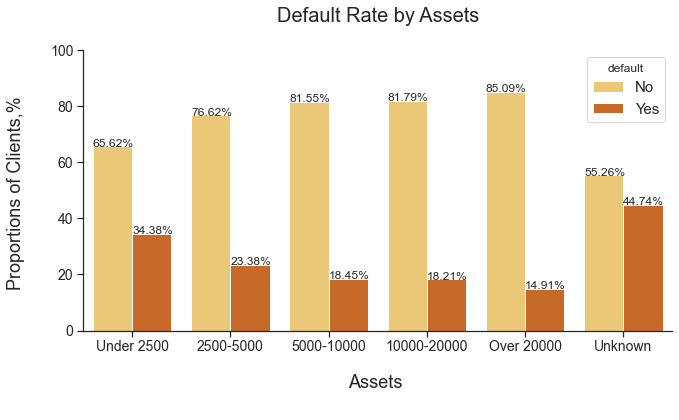

In [44]:
df_train['assetsgroup']=df_train['assets'].apply(group_assets)
df_assets = df_train.groupby('assetsgroup')['status'].value_counts(normalize=True).mul(100)
df_assets = df_assets.rename('percent').reset_index()
df_assets['status'].replace({0:'No', 1:'Yes'}, inplace=True)
order=['Under 2500', '2500-5000','5000-10000','10000-20000','Over 20000','Unknown']

sns.set_theme(style="ticks")
g = sns.catplot(x='assetsgroup',y='percent',hue='status',kind='bar',order=order, data=df_assets, aspect=1.6, height=6, legend=False,palette="YlOrBr")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Assets\n ',fontsize=20)
plt.xlabel('Assets \n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=14)
plt.legend(fontsize=15, loc='upper right', title='default')

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()



- Assets variable has also a negative correlation with the risk of default. The less the assets higher the risk. For the unknown category,  most likely they have no assets. We will fill those missing values in the next section.

#### Drop the added columns created for grouping

In [45]:
df_train.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price',
       'amountgroup', 'timegroup', 'seniorgroup', 'incomegroup', 'agegroup',
       'assetsgroup'],
      dtype='object')

In [46]:
df_train= df_train.drop(['amountgroup', 'timegroup', 'seniorgroup', 'incomegroup','agegroup', 'assetsgroup'], axis=1)

###  Relationship between the Categorical variables and Label (Default Status) 

In [47]:
cat_cols=df_train.select_dtypes(include= 'object').columns.tolist()
df_train[cat_cols].nunique()

home       6
marital    5
records    2
job        4
dtype: int64

- To to be able to calculate the correlations we must convert the categorical variables to numerical types. 

In [48]:
df_cats= pd.get_dummies(df_train[cat_cols])
corr=pd.concat([df_train['status'], df_cats], axis=1).corr()['status'].sort_values(ascending=False)
corr = corr[corr!=1]
corr

records_yes          0.271365
job_parttime         0.229212
home_other           0.124602
home_rent            0.116081
marital_separated    0.081400
marital_single       0.067960
job_freelance        0.053415
job_others           0.053285
home_private         0.035621
home_parents         0.021215
home_ignore          0.020055
marital_divorced     0.019700
marital_widow        0.001183
marital_married     -0.098059
home_owner          -0.196797
job_fixed           -0.210372
records_no          -0.271365
Name: status, dtype: float64

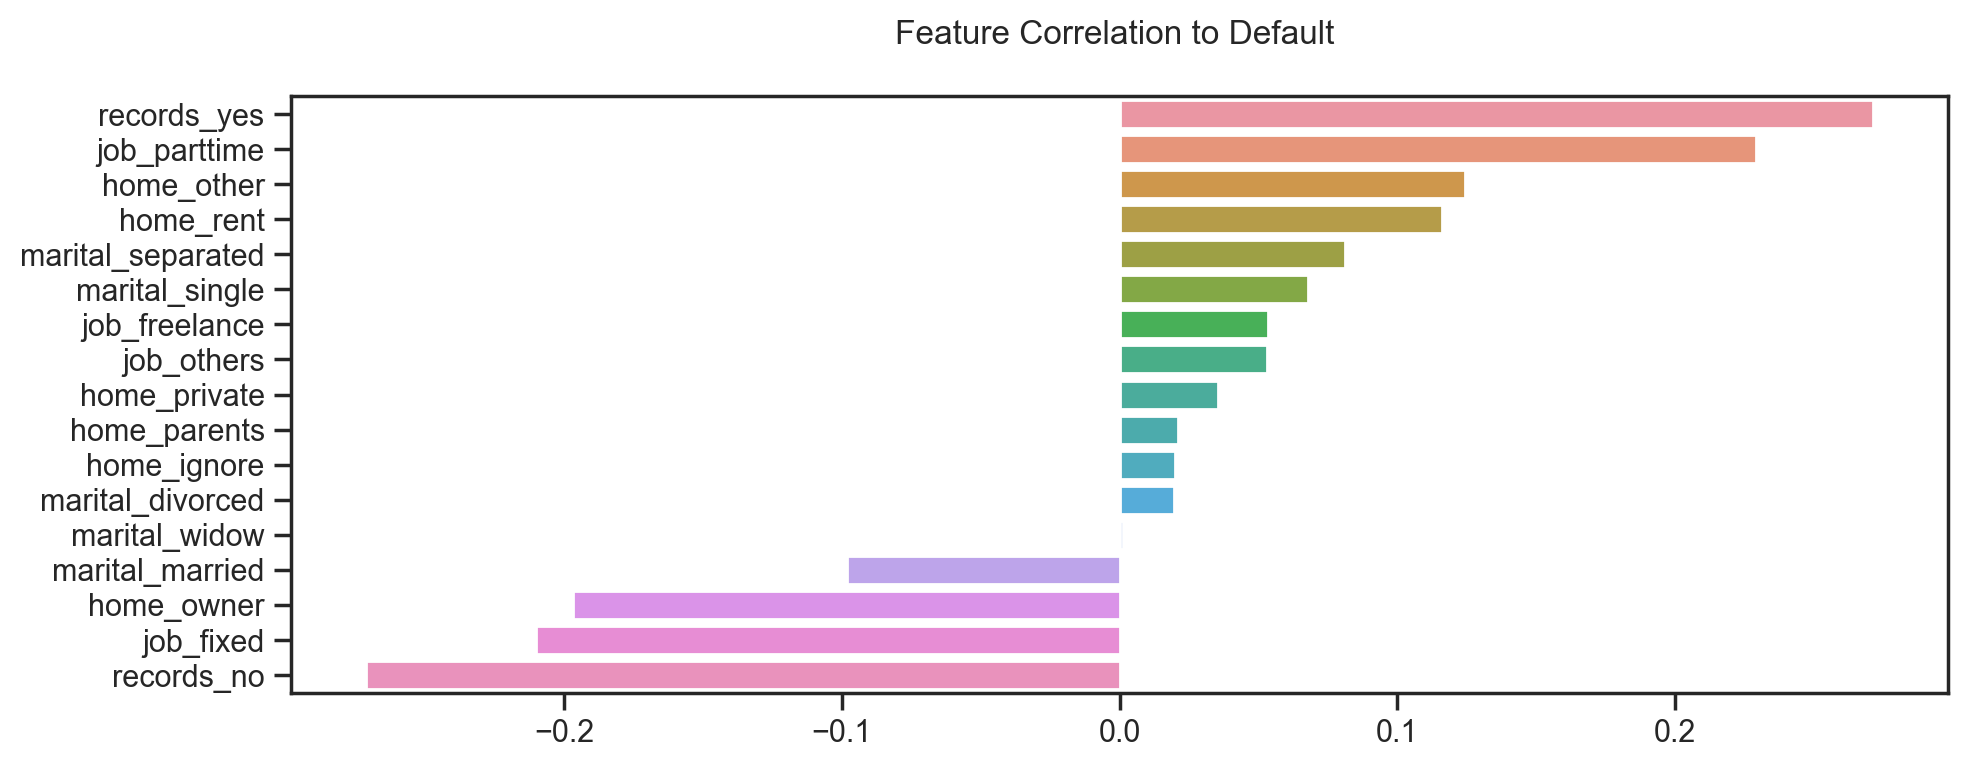

In [49]:
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(y=corr.index, x=corr.values)
plt.title('Feature Correlation to Default \n')
#plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

### Insights from the Categorical Feature Correlation
 Some of the top positive correlations suggest that, the clients below have the highest risk of default:
  - they have some records in the bank (we don't know what the records variable represents, but it is negative, maybe a previous default record?)
  - their jobs are part time  
  - they are not home owners or renting
  - their marital status is separated.

  
<br>
Some of the top negative correlations suggest that, the customers below have the highest chance of loan approval (not default):

  - they have no records
  - they have fixed jobs
  - they are home owners
  - they are married.
  

Lets look at closer to several of these variables to verify the observations above.

### Default Rate and Record

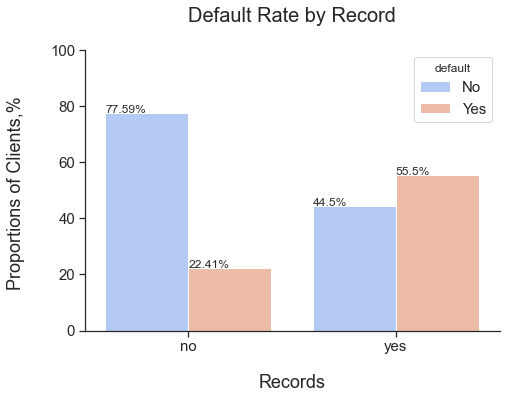

In [50]:
x,y = 'records', 'status'

df_record = df.groupby(x)[y].value_counts(normalize=True)
df_record = df_record.mul(100)
df_record = df_record.rename('percent').reset_index()
df_record['status'].replace({0:'No', 1:'Yes'}, inplace=True)

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_record, aspect=1.2, height=6, legend=False, palette="coolwarm")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Record\n ',fontsize=20)
plt.xlabel('Records\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='default')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   

- More than half of the clients who has records are rejected (default).

### Default Rate and  Job Type

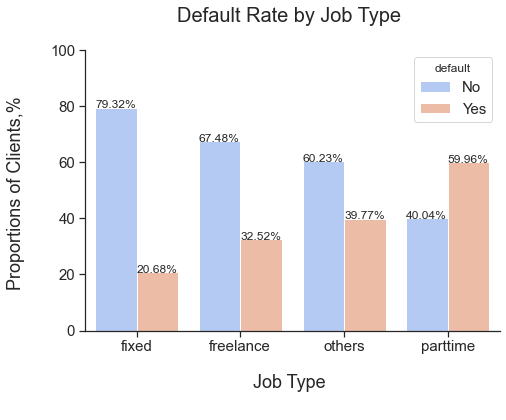

In [51]:
x,y = 'job', 'status'

df_job = df.groupby(x)[y].value_counts(normalize=True)
df_job = df_job.mul(100)
df_job = df_job.rename('percent').reset_index()
df_job['status'].replace({0:'No', 1:'Yes'}, inplace=True)

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_job, aspect=1.2, height=6, legend=False,palette="coolwarm")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Job Type \n ',fontsize=20)
plt.xlabel('Job Type \n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='default')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   



- The less secure the client's job, higher the risk of default.

### Default Rate and Home

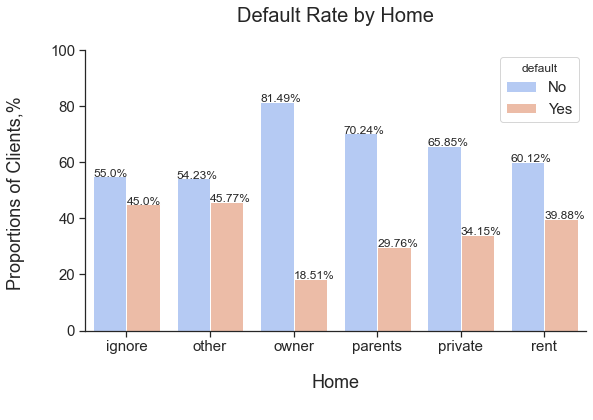

In [52]:
x,y = 'home', 'status'

df_home = df.groupby(x)[y].value_counts(normalize=True)
df_home = df_home.mul(100)
df_home = df_home.rename('percent').reset_index()
df_home['status'].replace({0:'No', 1:'Yes'}, inplace=True)

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_home, aspect=1.4, height=6, legend=False, palette="coolwarm")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Home\n ',fontsize=20)
plt.xlabel('Home\n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper right', title='default')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   

- Home owners has the highest chance of approval. 

### Default Rate and  Marital Status

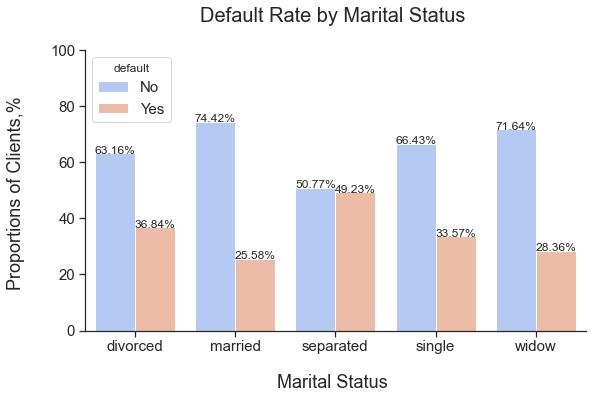

In [53]:
x,y = 'marital', 'status'

df_marital = df.groupby(x)[y].value_counts(normalize=True)
df_marital = df_marital.mul(100)
df_marital = df_marital.rename('percent').reset_index()
df_marital['status'].replace({0:'No', 1:'Yes'}, inplace=True)

sns.set_theme(style="ticks")
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df_marital, aspect=1.4, height=6, legend=False,palette="coolwarm")
g.ax.set_ylim(0,100)

plt.title('Default Rate by Marital Status \n ',fontsize=20)
plt.xlabel('Marital Status \n',fontsize=18, labelpad=20)
plt.ylabel('Proportions of Clients,% \n',fontsize=18)
plt.tick_params(labelsize=15)
plt.legend(fontsize=15, loc='upper left', title='default')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

    
plt.tight_layout()
plt.show()
   



- Clients who are married has the highest chance of approval, followed by widows.

## 6. Data Preparation for Machine Learning Algorithms   

### Separate the Predictors and the Label¶
First, separate the data for X and y, predictors and target, respectively.


In [54]:
X = df_train.drop('status', axis=1) #Feature data frame
y= df_train['status'] #target

### Data Cleaning
#### Drop the previously chosen columns, drop_cols

In [55]:
X.drop(drop_cols, axis=1, inplace=True)

###  Creating Tranformation Pipelines

In [56]:
# Separate the feature data into numerical and categorical sections
X_num= X.select_dtypes(include= 'number')
X_cat= X.select_dtypes(include= 'object')
num_attribs=list(X_num)
cat_attribs=list(X_cat)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#### Pipeline for Numerical Features

In [58]:
num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy ='constant')),
    ('std_scaler', StandardScaler()),
])

#### Pipeline for Categorical Features
- We will convert them to numeric using onehot encoding below.

In [59]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

### Full Preprocessing Pipeline 

In [60]:
from sklearn.compose import ColumnTransformer

In [61]:
full_preprocessing =ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline,cat_attribs),
])

## 7.  Training and  Evaluation of a Shortlist of Promising Models


In [62]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score


### Model Training

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
log_reg= Pipeline([
    ('pre',full_preprocessing),
    ('log_reg', LogisticRegression(solver='liblinear', random_state=42))]
)

In [65]:
tree= Pipeline([
    ('pre',full_preprocessing),
    ('tree', DecisionTreeClassifier(random_state=42))]
)

In [66]:
rf = Pipeline([
    ('pre',full_preprocessing),
    ('rf',RandomForestClassifier(n_jobs=-1, random_state=42) )]
)

In [67]:
knn= Pipeline([
    ('pre',full_preprocessing),
    ('knn',KNeighborsClassifier() )]
)

In [68]:
### A quick look for each model

In [69]:
models = []
models.append(('Logistic Regression', log_reg))
models.append(('Decision Tree', tree))
models.append(('Random Forests', rf))
models.append(('KNN', knn ))

In [70]:
names=[]
scores_list = []

for name, model in models:
    scores= cross_validate(model, X, y, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=True)
    mean_scores= (pd.DataFrame(scores).mean().round(2))
    scores_list.append(mean_scores)
    names.append(name)
    
    print(name)
    print(mean_scores,'\n')

Logistic Regression
fit_time          0.06
score_time        0.03
test_accuracy     0.79
train_accuracy    0.80
test_roc_auc      0.83
train_roc_auc     0.83
dtype: float64 

Decision Tree
fit_time          0.06
score_time        0.03
test_accuracy     0.72
train_accuracy    1.00
test_roc_auc      0.66
train_roc_auc     1.00
dtype: float64 

Random Forests
fit_time          1.34
score_time        0.15
test_accuracy     0.78
train_accuracy    1.00
test_roc_auc      0.82
train_roc_auc     1.00
dtype: float64 

KNN
fit_time          0.03
score_time        0.29
test_accuracy     0.77
train_accuracy    0.83
test_roc_auc      0.76
train_roc_auc     0.90
dtype: float64 



- Based on the train accuracy values the Decision tree and Random Forest are perfectly overfitting. KNN is also overfitting.
To deal with the overfitting we must try to simplify the models. Below we will optimize the models to choose the best parameters.

### Optimizing the Models

In [71]:
param_grid=[{'log_reg__penalty': ['l1','l2'], 'log_reg__C': [0.001,0.01,0.1,1,10,100,1000]},
            {'tree__max_leaf_nodes': [2,3,4], 'tree__max_depth':[2,3,4]},
            [{'rf__n_estimators':[3,10,30], 'rf__max_features': [2,4,6,8]}, 
            {'rf__bootstrap': [False],'rf__n_estimators':[3,10], 'rf__max_features': [2,3,4]}],
           {'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}]


In [72]:
params=[]
estimators=[]

for (name, model), param_grid in zip(models, param_grid):
    grid_search=GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y);
    param= grid_search.best_params_
    estimator= grid_search.best_estimator_
    params.append(param)
    estimators.append(estimator)


In [73]:
best_params= dict(zip(names, params)) 
best_estimators=dict(zip(names, estimators)) 
best_estimators_list=list(zip(names, estimators)) 
print(best_params)

{'Logistic Regression': {'log_reg__C': 1, 'log_reg__penalty': 'l2'}, 'Decision Tree': {'tree__max_depth': 2, 'tree__max_leaf_nodes': 4}, 'Random Forests': {'rf__max_features': 4, 'rf__n_estimators': 30}, 'KNN': {'knn__n_neighbors': 7}}


In [74]:
names=[]
scores_list = []
accuracy_std=[]
roc_auc_std=[]

for name, model in best_estimators_list:
    scores= cross_validate(model, X, y, cv=5, scoring=['accuracy', 'roc_auc', 'precision', 'recall'], return_train_score=False)
    mean_scores= (pd.DataFrame(scores).mean().round(2)).to_dict()
    scores_list.append(mean_scores)
    acc_std= scores['test_accuracy'].std().round(3)
    auc_std=scores['test_roc_auc'].std().round(3)
    names.append(name)
    accuracy_std.append(acc_std)
    roc_auc_std.append(auc_std)

In [75]:
results= pd.DataFrame(scores_list)
results.index= names
results['accuracy_std']=accuracy_std
results['roc_auc_std']=roc_auc_std
results=results.sort_values(by=['test_roc_auc'], ascending=False)
results

,fit_time,score_time,test_accuracy,test_roc_auc,test_precision,test_recall,accuracy_std,roc_auc_std
Logistic Regression,0.05,0.03,0.79,0.83,0.70,0.48,0.009,0.018
Random Forests,0.21,0.07,0.78,0.81,0.65,0.45,0.015,0.018
KNN,0.06,0.35,0.77,0.77,0.65,0.41,0.009,0.019
Decision Tree,0.03,0.03,0.74,0.70,0.64,0.18,0.010,0.026


- The best model is Logistic Regression with a high precision but also the highest recall. Since 
the goal is to predict the clients who are not going to pay the loan back (default), we must determine not only
how many people will actually going to default (precision) but also we don't want to fail to identify clients by 
predicting false negatives. False negatives occur when we predict the clients won't default, but they will. In other words, the bank give the loan to the clients predicting they will pay back but they won't. In this business problem this is what we try to avoid. The better the recall, fewer false negatives we have.

- One way to compare the classifiers to measure the AUC value, the area under the curve on a True Positive Rate vs False Positive
plot$^2$. The **test_roc_auc** column above shows that the Logistic Regression is best model followed by the Random Forest.  


### Model Evaluation on Training Data

In [76]:
final_clf= best_estimators['Logistic Regression']

In [77]:
from sklearn.model_selection import cross_val_predict
y_pred= cross_val_predict(final_clf, X, y, cv=5)

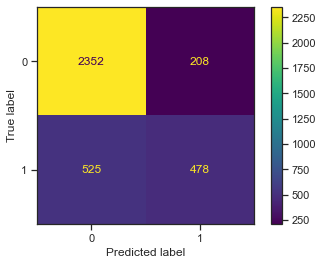

In [78]:
cm=confusion_matrix(y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis') 
plt.grid(False)
plt.show()

In [79]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2560
           1       0.70      0.48      0.57      1003

    accuracy                           0.79      3563
   macro avg       0.76      0.70      0.72      3563
weighted avg       0.78      0.79      0.78      3563



- Precision, the accuracy of the positive prediction is 70%. Another words, only 70% of the postive predictions
turned out to be correct.
- Recall, the positive rate, the ratio of positive instances that are correctly detected, here only 48%.
- F1 score is the harmonic mean of the precision and recall.

In [80]:
from sklearn.metrics import RocCurveDisplay

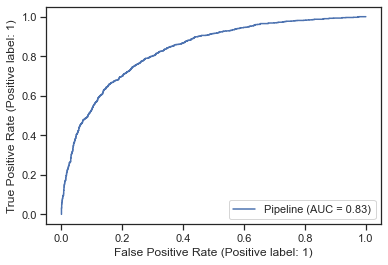

In [81]:
RocCurveDisplay.from_estimator(final_clf, X, y)
plt.show()

- The area under the curve, the ROC- AUC value is 0.83. A perfect classifier will have a ROC-AUC value equal to 1,
while a prely random classifier will have ROC-AUC value equal to 0.5 $^2$.

## 8. Testing the Model Performance

#### Prepare the test data

In [82]:
X_test= df_test.drop('status', axis=1) #Feature data frame
y_test= df_test['status'] #target
X_test.drop(drop_cols, axis=1, inplace=True)

In [83]:
final_pred=final_clf.predict(X_test)

In [84]:
#probability score
final_pred_probs = final_clf.predict_proba(X_test)
final_pred_probs  = final_pred_probs [:, 1]

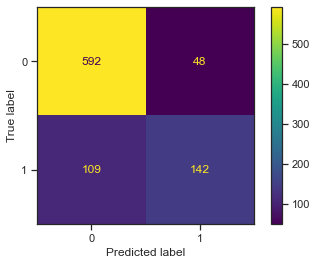

In [85]:
cm=confusion_matrix(y_test,final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis') 
plt.grid(False)
plt.show()

In [86]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       640
           1       0.75      0.57      0.64       251

    accuracy                           0.82       891
   macro avg       0.80      0.75      0.76       891
weighted avg       0.82      0.82      0.82       891



- Our model performed even better on the test data. Precision 75% and recall 57%.

### Final Report

In [87]:
final_results=pd.DataFrame({'Index':y_test.index, 'default status':y_test.values})
final_results['predictions']= final_pred
final_results["probability_to_default_percent"] = (final_pred_probs*100).round(2)

In [88]:
final_results=final_results.sort_values(by=['probability_to_default_percent'], ascending=False)
final_results

,Index,default status,predictions,probability_to_default_percent
100,4420,0,1,98.46
569,1313,1,1,98.45
256,2398,1,1,98.33
797,1892,1,1,98.16
752,443,1,1,97.98
...,...,...,...,...
24,1722,0,0,0.18
307,4265,0,0,0.12
288,398,0,0,0.03
419,2872,0,0,0.03


In [89]:
def group(probability_to_default_percent):
    if probability_to_default_percent >= 80 :
        return 'high'
    elif probability_to_default_percent < 60:
        return 'low'
    else:
        return 'medium'

final_results['Risk']=final_results['probability_to_default_percent'].apply(group)
final_results

,Index,default status,predictions,probability_to_default_percent,Risk
100,4420,0,1,98.46,high
569,1313,1,1,98.45,high
256,2398,1,1,98.33,high
797,1892,1,1,98.16,high
752,443,1,1,97.98,high
...,...,...,...,...,...
24,1722,0,0,0.18,low
307,4265,0,0,0.12,low
288,398,0,0,0.03,low
419,2872,0,0,0.03,low


## 9. Model Deployment

#### Saving the Model

In [90]:
import joblib

In [91]:
final_model_default=final_clf

In [92]:
joblib.dump(final_model_default, 'final_model_default.pkl')

['final_model_default.pkl']

## 10. Conclusions

The clients;

- who have previous record in the bank,
- who have low income and low assets
- who don't have secure job
- who don't have housing security.
- who are young and have less job experience
- who are not married

have high risk of default. How much each of these variable effects the decision is determined by the final model. Our final model predicts whether a client have the risk of default with an accuracy score of 82%.